In [16]:
#importing the packages

import numpy as np
import re
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [17]:
# opening the text file, reading it and closing it

f=open('pg12839.txt')
ds=f.read()
f.close

<function TextIOWrapper.close>

In [18]:
# print (ds.index('Chapter I'))
# print (ds[4475:9999])
start=ds.index('Chapter I')

start=4475


In [30]:
#splitting data on the basis of '/n'(next line character)

#TODO------DELETE------------data=' '.join(ds[start:length].split('/n'))

# print(data)

#joining the data on the basis of ' ' and then converting it to lower characters

data=' '.join([ix.strip() for ix in ds[start:len(ds)].split('\n')])
length=len(data)
# print(data)

In [31]:
# creating an empty dictionary T which will store the context 
T = {}

# define order of the Markov chain
order = 30

for ix in range(length-order):
    # get the current context
    ctx = data[ix:ix+order]
    
    # get the future val
    future_val = data[ix+order]
    
    # check if the context exists
    if T.get(ctx) is None:
        T[ctx] = {}
        T[ctx][future_val] = 1
    else:
        # check if the future_val key exists
        if T[ctx].get(future_val) is None:
            T[ctx][future_val] = 1
        else:
            T[ctx][future_val] += 1

In [32]:
# all the occurrences of alphabets are converted into probabilities by dividing the sum of values
for kx in T.keys():
    s = float(sum(T[kx].values()))
    
    for k in T[kx].keys():
        T[kx][k] = T[kx][k]/s
# print (T)

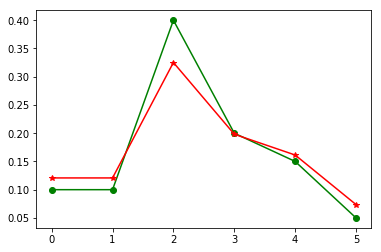

In [33]:
# Considering the boltzmann distribution,
#Read more at:https://papers.nips.cc/paper/966-boltzmann-chains-and-hidden-markov-models.pdf
#we define a function for the temperature or what we can call is probabilities in exponential form
def temp_sample(probs, temp=1.0):
    probs = np.asarray(probs)
    exp_probs = np.exp(np.log(probs) / temp)
    
    return list(exp_probs / exp_probs.sum())

#here is an example to show how the function works and a plot to show the effects in probabilities
p = [0.1, 0.1, 0.4, 0.2, 0.15, 0.05]
q = temp_sample(p, 1.4)

plt.plot(p, 'go-')
plt.plot(q, 'r*-')

plt.show()


In [34]:
#this is the function that generates the next variable

def generate_next(ctx, diversity=1.0):
    #we generate a random number ranged between 0 and 1
    r = np.random.random()
    
    #'possible' is a dictionary with context 'ctx' 
    possible = T.get(ctx)
    
    if possible is None:
        return ' '
    #shuffled_keys is a dictionary of keys of 'possible' dictionary
    
    shuffled_keys = possible.keys()
    #randomly shuffling the keys  and type casting into shuffled_keys
    
    random.shuffle(list(shuffled_keys))
    
    #print(shuffled_keys)
    
    key_probs = [possible[kx] for kx in shuffled_keys]
    
    #returns the expected probabilities  
    key_probs = temp_sample(key_probs, temp=diversity)
    
    # checking if the possible values of keys are greater then the probability of alphabets are returns the key
    # and if probabilities doesnt satisfy the requiered conditions then a random number is returned

    for kx in range(len(key_probs)):
        if r < key_probs[kx]:
            return list(shuffled_keys)[kx]
    return random.choice(list(shuffled_keys))

In [36]:
#ind is a random number generated inside the range of context
ind = int(np.random.random()*(len(data)-order))

#initial_state is the context generated with random number 'ind' to the 'ind+order'
initial_state = data[ind:ind+order]

#ctx is the context starting from the initial state
ctx = initial_state

sentence = '' + ctx
# print(sentence)

#prints the next character or say next words on predictive text search
for ix in range(len(data)):
    nxt = generate_next(ctx, diversity=0.81)
    sentence += nxt
    ctx = sentence[-order:]

print (sentence)

He must have disappeared in the forest the moment Henry Collins had told him what was afoot, for there could be no doubt Collins had informed him. After the moon rose, so that he could see well, Lumley must have come to the cabin, stolen food and candles, cautiously removed the aerial and grounded the battery, and gone straight down the valley to set his fires. If he could not get the money for the timber, or at least some of it, quite evidently Lumley did not intend to allow any one else to have it, not even the state.  In his own mind Charley had no doubt whatever that the incendiary was Lumley, and that he had done exactly the things Charley pictured him as doing. Even now he must be somewhere in the forest. But Charley felt relieved when he realized that in all probability Lumley had no firearms. He must have fled without taking time to equip himself. Also Charley doubted if he would remain in the forest. The forester would be certain to scour the woods for him, and Lumley could ha